<a href="https://colab.research.google.com/github/jsong55/Machine_Learning/blob/master/03_computer_vision_multiclass_classificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class image classification
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

## 1. Import the data

In [ ]:
import zipfile
import os
import random
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-10-13 22:23:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   278MB/s    in 1.8s    

2022-10-13 22:23:41 (278 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

image shape: (512, 512, 3)


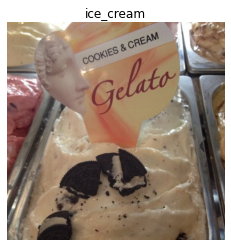

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
# visualize
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

img = view_random_image(target_dir=train_dir,
              target_class=random.choice(class_names))

## Preprocess the data

In [ ]:
# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                      rotation_range=0.2,
                      zoom_range=0.2,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                target_size=(224,224),
                                batch_size=32,
                                class_mode="categorical",
                                shuffle=True)


Found 7500 images belonging to 10 classes.


## Create model

In [ ]:
model_1 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])

history_1 = model_1.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 39s 163ms/step - loss: 2.2240 - accuracy: 0.1680 - val_loss: 2.0294 - val_accuracy: 0.2632
Epoch 2/5
235/235 [==============================] - 39s 164ms/step - loss: 1.8829 - accuracy: 0.3540 - val_loss: 1.8458 - val_accuracy: 0.3684
Epoch 3/5
235/235 [==============================] - 39s 164ms/step - loss: 1.4442 - accuracy: 0.5164 - val_loss: 2.1308 - val_accuracy: 0.2993
Epoch 4/5
235/235 [==============================] - 38s 160ms/step - loss: 0.8475 - accuracy: 0.7216 - val_loss: 2.5643 - val_accuracy: 0.2632
Epoch 5/5
235/235 [==============================] - 38s 161ms/step - loss: 0.3172 - accuracy: 0.9040 - val_loss: 3.6135 - val_accuracy: 0.2993


## Evaluate the model

In [ ]:
# evaluate the test data
model_1.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 3.7794 - accuracy: 0.2900


[3.779355764389038, 0.28999999165534973]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

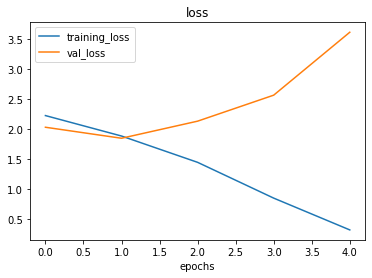

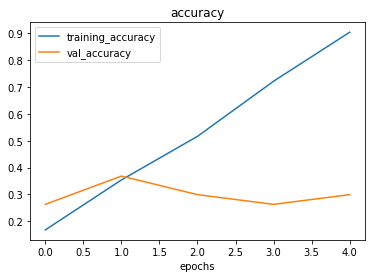

In [ ]:
model_1.summary()
# plot the loss curve
plot_loss_curves(history_1)

It seems our model is overfitting, the training set quite badly, in other words, it is getting great results on the training data but fails to generalize well to unseen data and performs poorly to the test dataset.

## Adjust the model hyperparameters (to beat the baseline/reduce overfitting)
The model is not generalizing well to unseen data. Here, try and fix overfitting by...
* Simply the model: one way to simplify a model is to reduce the # of layers or reduce # hidden units in layers
* Add more data: to have more data to give the model more opportunity to learn diverse patterns...
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Use transfer learning: it leaverages the patterns another model has learned on similar data to your own and allows you to use those patterns to your own dataset


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 29160)             0         
                                                                 
 dense_5 (Dense)             (None, 10)               

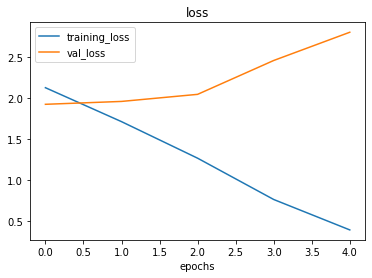

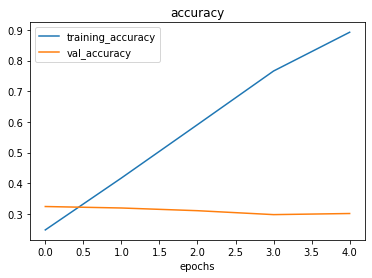

In [ ]:
model_2.summary()
# plot the loss curve
plot_loss_curves(history_2)

In [ ]:
# try to remove 2 conv layers
model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])

history_2 = model_2.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 192ms/step - loss: 2.1262 - accuracy: 0.2481 - val_loss: 1.9243 - val_accuracy: 0.3244
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7134 - accuracy: 0.4173 - val_loss: 1.9593 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 45s 192ms/step - loss: 1.2689 - accuracy: 0.5913 - val_loss: 2.0453 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.7668 - accuracy: 0.7661 - val_loss: 2.4570 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.3968 - accuracy: 0.8925 - val_loss: 2.8006 - val_accuracy: 0.3016


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 29160)             0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [ ]:
# try to use augmented data
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss="categorical_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])

history_3 = model_3.fit(train_data_augmented,
              epochs=5,
              steps_per_epoch=len(train_data_augmented),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 467ms/step - loss: 2.2083 - accuracy: 0.1819 - val_loss: 2.0802 - val_accuracy: 0.2588
Epoch 2/5
235/235 [==============================] - 111s 472ms/step - loss: 2.0699 - accuracy: 0.2608 - val_loss: 1.9031 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9817 - accuracy: 0.3080 - val_loss: 1.8114 - val_accuracy: 0.3708
Epoch 4/5
235/235 [==============================] - 110s 468ms/step - loss: 1.9268 - accuracy: 0.3300 - val_loss: 1.8917 - val_accuracy: 0.3272
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 1.8868 - accuracy: 0.3515 - val_loss: 1.7133 - val_accuracy: 0.4124


79/79 [==============================] - 11s 142ms/step - loss: 1.7133 - accuracy: 0.4124


[1.7132576704025269, 0.4124000072479248]

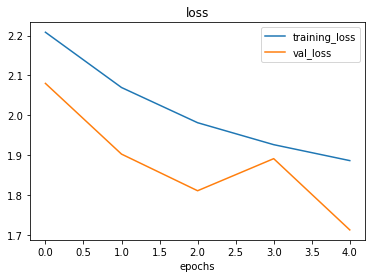

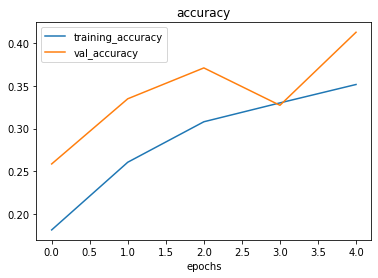

In [ ]:
# plot the loss curve
plot_loss_curves(history_3)
model_3.evaluate(test_data)

## Repeat until satisfied


In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

## Marking a prediction with our trained model on our own custom data

1/1 [==============================] - 0s 16ms/step


0

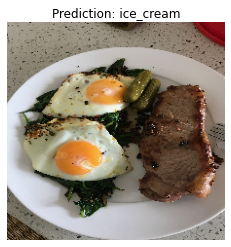

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_3, 
      filename="03-steak.jpeg", 
      class_names=class_names)

## Save and load model

In [ ]:
# save a mnodel
model_3.save("saved_trained_model_3")

# Load in a trained model and evaluate
loaded_model_10.tf.keras.models.load_model("saved_trained_model_3")
loaded_model_10.evaluate(test_data)

# Functions:

In [ ]:
def view_random_image(target_dir,target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # show the image shape

  return img

def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  # plot loss
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  # create a function to import image and resize it to be able to be used in the model
def load_and_prep_image(filename, img_shape=224):
  """
  read an image from filename, turns it into a tensor and reshape it
  to (image_shape, image_shape, color_channels)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img,channels=3)
  # resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image (pixel values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model,filename,class_names):
  """
  import and image, make a prediction with model and plots the image
  with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)
  # make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # add in logic for multi class
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
  # get the predicted class
    pred_class = class_names[int(tf.round(pred))]


  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  return 0